In [1]:
from obspy.core.utcdatetime import UTCDateTime
import pandas as pd
import numpy as np
from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt
import obspy
import glob

In [10]:
client = Client('IRIS')

event = client.get_events(eventid=8477537)

ev_t = event[0].origins[0].time

event

1 Event(s) in Catalog:
2015-07-04T15:42:18.480000Z | +44.090, -122.833 | 4.1 mb

In [11]:
type(ev_t)

obspy.core.utcdatetime.UTCDateTime

In [12]:
#change these variables for different model runs
examplename = 'observed_data_salem_1hz'
freqmax = 1
pre_filt = (0.063 , 0.28 , 0.9*freqmax, freqmax)
resp_prefilt_bottom = [0.063,0.28]

workingdir = '/Users/rshimony/Desktop/WillametteValley/salem_eq/'

start_t = '2022-10-07T12:52:36.00Z'
station_file = '/Users/rshimony/Desktop/WillametteValley/salem_eq/metadata/station_inventory.csv'


## Directories to be used in pulling data ##
# Need a list of earthquakes and stations
stndata = pd.read_csv(station_file, header = 0)
net = np.array(stndata["network"])
stnm = np.array(stndata["name"])
chnm = np.array(stndata["channel"])
# loc = np.array(['*']* len(net))
lat = np.array(stndata["latitude"])
lon = np.array(stndata["longitude"])

t1 = ev_t
t2 = t1 + (75)#delta in seconds

In [15]:
fdsn_client = Client('IRIS')
st_exmple = fdsn_client.get_waveforms(network='UO', station='COBRA', location='*',
                                       channel='HNE', starttime=t1, endtime=t2,
                                       attach_response=True)

tr_exmple = st_exmple[0]
tr_acc = tr_exmple.copy()
tr_vel = tr_exmple.copy()
tr_disp = tr_exmple.copy()

# tr_acc.detrend(type = 'linear') 
# tr_acc.remove_response(output='ACC', pre_filt=pre_filt)
# tr_acc.plot()

tr_vel.detrend(type = 'linear') 
tr_vel.remove_response(output='VEL', pre_filt=pre_filt)
tr_vel.plot()

# tr_disp.detrend(type = 'linear') 
# tr_disp.remove_response(output='DISP', pre_filt=pre_filt)
# tr_disp.plot()

tr_disp.integrate(method='cumtrapz')
tr_disp.detrend(type = 'linear') 
tr_disp.remove_response(output='DISP', pre_filt=pre_filt)
tr_disp.plot()

tr_acc.differentiate()
tr_acc.detrend(type = 'linear') 
tr_acc.remove_response(output='ACC', pre_filt=pre_filt)
tr_acc.plot()

data_acc = tr_acc.data
delta_acc = tr_acc.stats.delta

data_vel = tr_vel.data
delta_vel = tr_vel.stats.delta

data_disp = tr_disp.data
delta_disp = tr_disp.stats.delta


FDSNNoDataException: No data available for request.
Detailed response of server:



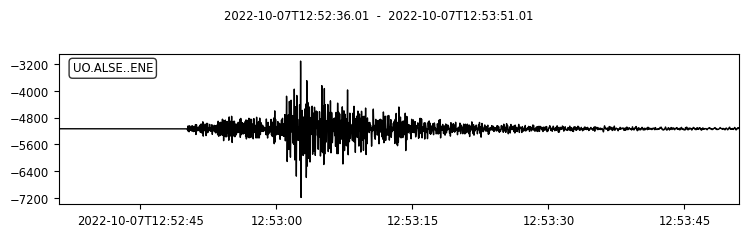

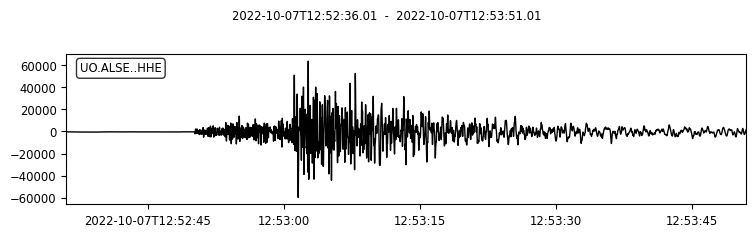

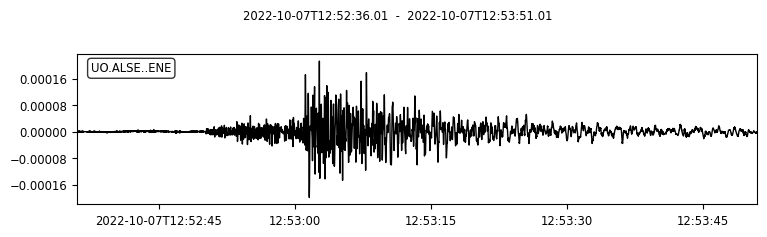

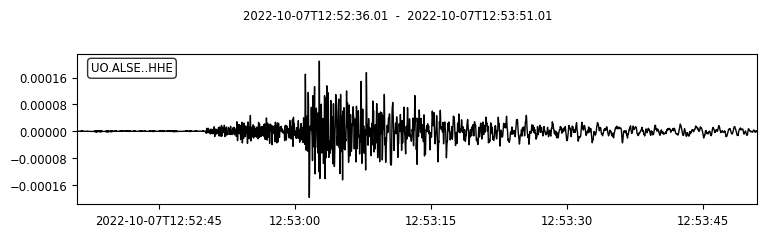

In [81]:
st_exmple_1 = fdsn_client.get_waveforms(network='UO', station='ALSE', location='*',
                                       channel='HHE,ENE', starttime=t1, endtime=t2,
                                       attach_response=True)


ex_acc = st_exmple_1[0].copy()
ex_vel = st_exmple_1[1].copy()

data_ex_acc = ex_acc.data
delta_ex_acc = ex_acc.stats.delta

data_ex_vel = ex_vel.data
delta_ex_vel = ex_vel.stats.delta

ex_acc.plot()
ex_vel.plot()

ex_acc.detrend(type = 'linear') 
ex_acc.remove_response()
ex_acc.plot()

ex_vel.detrend(type = 'linear') 
ex_vel.remove_response()
ex_vel.plot()

data_ex_acc_ir = ex_acc.data
delta_ex_acc_ir = ex_acc.stats.delta

data_ex_vel_ir = ex_vel.data
delta_ex_vel_ir = ex_vel.stats.delta

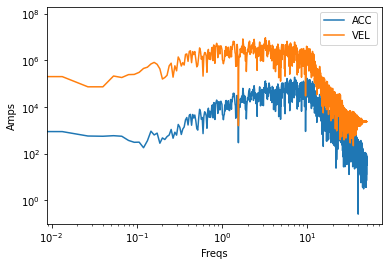

In [86]:
def amp_spec(y,dt):
    '''
    y is the input time series
    dt is the sampling interval
    
    return as outoput the shifted freq vector, and the shifted ampl. spectrum
    '''
    
    y_fft = np.fft.fft(y)
    ampl = np.abs(y_fft)  #this is the ampl. spectrum proper
    f = np.fft.fftfreq(len(y), dt) #this is the un-shifted frequency vector
    
    #now shift because you have OCD
    f = np.fft.fftshift(f)
    ampl = np.fft.fftshift(ampl)*2 #double if you are on;ly gping to plot the positive
    
    return f,ampl

freqs_ex_acc_ir , amps_ex_acc_ir = amp_spec(data_ex_acc_ir,delta_ex_acc_ir)
freqs_ex_vel_ir , amps_ex_vel_ir = amp_spec(data_ex_vel_ir,delta_ex_vel_ir)
freqs_ex_acc , amps_ex_acc = amp_spec(data_ex_acc,delta_ex_acc)
freqs_ex_vel , amps_ex_vel = amp_spec(data_ex_vel,delta_ex_vel)

plt.figure()
# plt.loglog(freqs_ex_acc_ir,amps_ex_acc_ir , label='ACC IR')
# plt.loglog(freqs_ex_vel_ir,amps_ex_vel_ir , label='VEL IR')
plt.loglog(freqs_ex_acc,amps_ex_acc , label='ACC')
plt.loglog(freqs_ex_vel,amps_ex_vel , label='VEL')
plt.xlabel('Freqs')
plt.ylabel('Amps')
plt.legend()

plt.show()

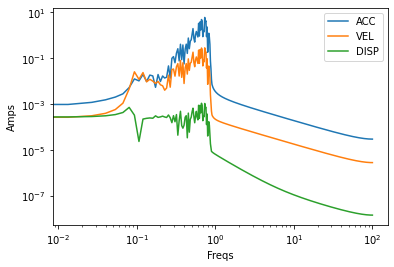

In [83]:
def amp_spec(y,dt):
    '''
    y is the input time series
    dt is the sampling interval
    
    return as outoput the shifted freq vector, and the shifted ampl. spectrum
    '''
    
    y_fft = np.fft.fft(y)
    ampl = np.abs(y_fft)  #this is the ampl. spectrum proper
    f = np.fft.fftfreq(len(y), dt) #this is the un-shifted frequency vector
    
    #now shift because you have OCD
    f = np.fft.fftshift(f)
    ampl = np.fft.fftshift(ampl)*2 #double if you are on;ly gping to plot the positive
    
    return f,ampl

freqs_acc , amps_acc = amp_spec(data_acc,delta_acc)
freqs_vel , amps_vel = amp_spec(data_vel,delta_vel)
freqs_disp , amps_disp = amp_spec(data_disp,delta_disp)

plt.figure()
plt.loglog(freqs_acc,amps_acc , label='ACC')
plt.loglog(freqs_vel,amps_vel , label='VEL')
plt.loglog(freqs_disp,amps_disp , label='DISP')
plt.xlabel('Freqs')
plt.ylabel('Amps')
plt.legend()

plt.show()

In [8]:
fdsn_client = Client('IRIS')
# Fetch waveform from IRIS FDSN web service into a ObsPy stream object
# and automatically attach correct response

dlsuccess = [False] * len(net)

for i in range(len(net)):
    try:
        st = fdsn_client.get_waveforms(network=net[i], station=stnm[i], location='*',
                                       channel=chnm[i], starttime=t1, endtime=t2,
                                       attach_response=True)
        dlsuccess[i] = True
    except:
        dlsuccess[i] = False
#         print(np.str(i) + ' has nothing')
        
    if dlsuccess[i]==True:
        tr = st[0]
        chan = tr.stats.channel
        t = tr.times(reftime=UTCDateTime(start_t))
        print(tr)

        tr_raw = tr.copy()
        icorr_sacfile_raw = workingdir + examplename + '/' + net[i] + '.' + stnm[i] + '.' + chan + '_raw.sac'
        tr_raw.write(icorr_sacfile_raw, format = 'sac')
        data_raw = tr_raw.data

        tr_unfilt = tr.copy()
        tr_unfilt.detrend(type = 'linear') 
        samprate = tr_unfilt.stats.sampling_rate
        prefilt_unfilt = (resp_prefilt_bottom[0], resp_prefilt_bottom[1], ((samprate/2)-5), (samprate/2))
        tr_unfilt.remove_response(output='VEL' , pre_filt=prefilt_unfilt)
        icorr_sacfile_unfilt = workingdir + examplename + '/' + net[i] + '.' + stnm[i] + '.' + chan + '_unfilt.sac'
        tr_unfilt.write(icorr_sacfile_unfilt, format = 'sac')
        data_unfilt = tr_unfilt.data

        tr_filt = tr.copy()
        tr_filt.detrend(type = 'linear')                
        tr_filt.remove_response(output='VEL', pre_filt=pre_filt)
        icorr_sacfile_filt = workingdir + examplename + '/' + net[i] + '.' + stnm[i] + '.' + chan + '_filt.sac'
        tr_filt.write(icorr_sacfile_filt, format = 'sac')
        data_filt = tr_filt.data

        fig, axs = plt.subplots(1,3, sharex=True,figsize = (14,2))
        axs[0].plot(t, data_raw)
        axs[1].plot(t, data_unfilt)
        axs[2].plot(t,data_filt)
        axs[0].set_title('raw data')
        axs[1].set_title('data instrument response corrected')
        axs[2].set_title('data filtered')
        plt.tight_layout()
        plt.xlim([-5,80])
        plt.savefig(workingdir + examplename+ '/' + net[i] + '.' + stnm[i]  + '.' + chan +'.png')
        plt.close()

CC.BRSP..BHE | 2022-10-07T12:52:36.020000Z - 2022-10-07T12:53:51.000000Z | 50.0 Hz, 3750 samples
CC.BRSP..BHN | 2022-10-07T12:52:36.020000Z - 2022-10-07T12:53:51.000000Z | 50.0 Hz, 3750 samples
CC.BRSP..BHZ | 2022-10-07T12:52:36.020000Z - 2022-10-07T12:53:51.000000Z | 50.0 Hz, 3750 samples
CC.BRSP.01.BDF | 2022-10-07T12:52:36.020000Z - 2022-10-07T12:53:51.000000Z | 50.0 Hz, 3750 samples
CC.GUAC.01.HDF | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
CC.HIYU..BHE | 2022-10-07T12:52:36.020000Z - 2022-10-07T12:53:51.000000Z | 50.0 Hz, 3750 samples
CC.HIYU..BHN | 2022-10-07T12:52:36.020000Z - 2022-10-07T12:53:51.000000Z | 50.0 Hz, 3750 samples
CC.HIYU..BHZ | 2022-10-07T12:52:36.020000Z - 2022-10-07T12:53:51.000000Z | 50.0 Hz, 3750 samples
CC.HOA..BHE | 2022-10-07T12:52:36.020000Z - 2022-10-07T12:53:51.000000Z | 50.0 Hz, 3750 samples
CC.HOA..BHN | 2022-10-07T12:52:36.020000Z - 2022-10-07T12:53:51.000000Z | 50.0 Hz, 3750 samples
CC.HOA..BHZ | 2022-10-07T12

GS.HAOK..HN1 | 2022-10-07T12:52:47.000000Z - 2022-10-07T12:53:47.990000Z | 100.0 Hz, 6100 samples
GS.HAOK..HN2 | 2022-10-07T12:52:47.000000Z - 2022-10-07T12:53:47.990000Z | 100.0 Hz, 6100 samples
GS.HAOK..HNZ | 2022-10-07T12:52:47.000000Z - 2022-10-07T12:53:47.990000Z | 100.0 Hz, 6100 samples
GS.TAUL2..HHE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
GS.TAUL2..HHN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
GS.TAUL2..HHZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
GS.TAUL3..HHE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
GS.TAUL3..HHN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
GS.TAUL3..HHZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
GS.TAUL4..HHE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
GS.TAUL4..HHN

UO.ALSE..HHE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.ALSE..HHN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.ALSE..HHZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.BCAT..HNE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UO.BCAT..HNN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UO.BCAT..HNZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UO.BEER..ENE | 2022-10-07T12:52:36.018393Z - 2022-10-07T12:53:51.008393Z | 100.0 Hz, 7500 samples
UO.BEER..ENN | 2022-10-07T12:52:36.018393Z - 2022-10-07T12:53:51.008393Z | 100.0 Hz, 7500 samples
UO.BEER..ENZ | 2022-10-07T12:52:36.018393Z - 2022-10-07T12:53:51.008393Z | 100.0 Hz, 7500 samples
UO.BEER..HHE | 2022-10-07T12:52:36.018393Z - 2022-10-07T12:53:51.008393Z | 100.0 Hz, 7500 samples
UO.BEER..HHN | 20

UO.HSO2..HHN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.HSO2..HHZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.IRYS..ENE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.IRYS..ENN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.IRYS..ENZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.IRYS..HHE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.IRYS..HHN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.IRYS..HHZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.JEFF..HNE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UO.JEFF..HNN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UO.JEFF..HNZ | 202

UO.NBFR..HHZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.NECAN..ENE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.NECAN..ENN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.NECAN..ENZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.NECAN..HHE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.NECAN..HHN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.NECAN..HHZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.NOMA..HNE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UO.NOMA..HNN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UO.NOMA..HNZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UO.OLBLU..E

UO.RSBO..HHZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.SAUVY..HNE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UO.SAUVY..HNN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UO.SAUVY..HNZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UO.SKAN..ENE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.SKAN..ENN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.SKAN..ENZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.SKAN..HHE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.SKAN..HHN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.SKAN..HHZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UO.SLTZ..HNE |

UO.WLOO..HHZ | 2022-10-07T12:52:36.018393Z - 2022-10-07T12:53:51.008393Z | 100.0 Hz, 7500 samples
UO.WLOO.EP.BDF | 2022-10-07T12:52:36.021000Z - 2022-10-07T12:53:50.996000Z | 40.0 Hz, 3000 samples
UO.WLOO.EP.BDO | 2022-10-07T12:52:36.021000Z - 2022-10-07T12:53:50.996000Z | 40.0 Hz, 3000 samples
UO.YANK..HNE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UO.YANK..HNN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UO.YANK..HNZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UW.ABER..ENE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.ABER..ENN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.ABER..ENZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.ABER..HHE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.ABER..HHN | 

UW.EDM..HHN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.EDM..HHZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.ELK..EHZ | 2022-10-07T12:52:36.011360Z - 2022-10-07T12:53:51.001360Z | 100.0 Hz, 7500 samples
UW.EYES..ENE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.EYES..ENN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.EYES..ENZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.FALCO..HNE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UW.FALCO..HNN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UW.FALCO..HNZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UW.FISH2..ENE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.FISH2..ENN | 

UW.MRIN..ENE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.MRIN..ENN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.MRIN..ENZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.MTM..EHZ | 2022-10-07T12:52:36.011387Z - 2022-10-07T12:53:51.001387Z | 100.0 Hz, 7500 samples
UW.NAHC..HNE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UW.NAHC..HNN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UW.NAHC..HNZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 200.0 Hz, 15001 samples
UW.NEMA..ENE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.NEMA..ENN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.NEMA..ENZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.NEMA..HHE | 202

UW.SKAMO..HHZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.SOS..EHZ | 2022-10-07T12:52:36.011347Z - 2022-10-07T12:53:51.001347Z | 100.0 Hz, 7500 samples
UW.SSO2..ENE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.SSO2..ENN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.SSO2..ENZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.SSO2..HHE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.SSO2..HHN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.SSO2..HHZ | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.TAKO..ENE | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.TAKO..ENN | 2022-10-07T12:52:36.010000Z - 2022-10-07T12:53:51.010000Z | 100.0 Hz, 7501 samples
UW.TAKO..ENZ | 2022-

In [17]:
alvy_sw4 = obspy.read('/Users/rshimony/Desktop/WillametteValley/val_event_data/observed_data_valevent/UW.ALVY.*')
alvy_npts = alvy_sw4[0].stats.npts
alvy_samprate = alvy_sw4[0].stats.sampling_rate
print(alvy_npts)
print(1/alvy_samprate)
alvy_sw4

12001
0.01


3 Trace(s) in Stream:
UW.ALVY..ENE | 2015-07-04T15:42:18.000000Z - 2015-07-04T15:44:18.000000Z | 100.0 Hz, 12001 samples
UW.ALVY..ENN | 2015-07-04T15:42:18.000000Z - 2015-07-04T15:44:18.000000Z | 100.0 Hz, 12001 samples
UW.ALVY..ENZ | 2015-07-04T15:42:18.000000Z - 2015-07-04T15:44:18.000000Z | 100.0 Hz, 12001 samples

In [ ]:
##########################################################

### Directories to be used in pulling data ##
## Need a list of earthquakes and stations
# stndata = pd.read_csv(station_file, delim_whitespace = True, header = 0)
# net = np.array(stndata["net"])
# stnm = np.array(stndata["#stnm"])
# chan = np.array(stndata["chan"])
# loc = np.array(['*']* len(net))
# lat = np.array(stndata["lat"])
# lon = np.array(stndata["lon"])

##########################################################

#plot filtered data
test = glob.glob(synthetic_dir + '*CX' + plotchanspecfem + '.semv')

#order stations by distance to the source
source_lat = 44.090 #N
source_lon = -122.831 #°W 
source_dep = 4.0 #km

x = []
for i in range(len(test)):
    name_specfem = (test[i].split('/')[-1])[0:-4]
    nets, stas, chans, ns =  name_specfem.split('.')
    print(name_specfem) 
    for j in range(len(stnm)):
        if stnm[j] == stas and chan[j][2] == plotchan and chans[2] == plotchanspecfem:
            print(stnm[j], stas, chans, ns)
            dist = compute_rrup(source_lon, source_lat, source_dep, lon[j], lat[j], 0.0)
            x.append([stnm[j], test[i], dist, lat[j], lon[j]])

station_dist = sorted(x, key=lambda x:x[2])

##########################################################

In [ ]:
#%%
 #plot each  station on same axes
n = len(station_dist)
fig, (axs) = plt.subplots(n,figsize = (16,10), sharex = True)
for i in range(len(station_dist)):
    print(station_dist[i][0])
    specfem =  station_dist[i][1]
    
    r = round(station_dist[i][2],2)

    trace2 = np.genfromtxt(specfem)
    trspecfem = trace2.T[1]
    tspecfem = trace2.T[0]
    stats = obs.core.trace.Stats()
    stats.sampling_rate = 1.0/samplingrate
    stats.npts = len(trspecfem)
    trt = obs.core.trace.Trace(data = trspecfem, header = stats)
    trt = bandpass(trt, 0.1, 0.7*freqmax, trt.stats.sampling_rate, corners=2, zerophase=True)
    
    ## get station name
    stn = station_dist[i][0]
    
    #########################
    data = glob.glob(workingdir + obsdata_dirname + '/'+ '*' + stn + '*' + plotchan + '.sac')[0]
    
    st = obs.read(data)
    tr = st[0]
    t = tr.times(reftime=UTCDateTime(start_t))
    
    axs[i].plot(t,tr.data, c = 'blue', label = 'data')
    axs[i].plot(tspecfem,trt,  c = 'orange', label  = 'specfem')
    
    axs[i].set_xlim([-5,45])

    limdata = max(abs(tr.data))
    limspecfem = max(abs(trt))
    lim = max(limdata, limspecfem)
    
    axs[i].set_ylim([-1*lim, lim])
    axs[i].set_ylim([-1*lim, lim])

    axs[i].locator_params(tight=True, nbins=4, axes = 'y')
    
    fig.text(0.5, 0.04, 'time after event (s)', ha='center', fontsize = 20)
    fig.text(0.04, 0.5, 'm/s', va='center', rotation='vertical', fontsize = 20)
    axs[0].legend(loc = 'upper right')
        
    plt.savefig(workingdir + examplename + '/compare_sameax_sharey_' + plotchan + 'comp.png')

    
plt.close('all')

In [21]:
##### Reading data from rec file

B027_8 = obspy.read("/Users/rshimony/Desktop/WillametteValley/Init_Model/talapas_results/no_refin/results/B027_8.*")
B030 = obspy.read("/Users/rshimony/Desktop/WillametteValley/Init_Model/talapas_results/no_refin/results/B030.*")
B032_1 = obspy.read("/Users/rshimony/Desktop/WillametteValley/Init_Model/talapas_results/no_refin/results/B032_1.*")
LANE = obspy.read("/Users/rshimony/Desktop/WillametteValley/Init_Model/talapas_results/no_refin/results/LANE.*")
BUCK = obspy.read("/Users/rshimony/Desktop/WillametteValley/Init_Model/talapas_results/no_refin/results/BUCK.*")
ALVY = obspy.read("/Users/rshimony/Desktop/WillametteValley/Init_Model/talapas_results/no_refin/results/ALVY.*")

B027_8_obs = obspy.read("/Users/rshimony/Desktop/WillametteValley/val_event_data/observed_data_valevent/PB.B027.*")
B030_obs = obspy.read("/Users/rshimony/Desktop/WillametteValley/val_event_data/observed_data_valevent/PB.B030.*")
B032_1_obs = obspy.read("/Users/rshimony/Desktop/WillametteValley/val_event_data/observed_data_valevent/PB.B032.*")
LANE_obs = obspy.read("/Users/rshimony/Desktop/WillametteValley/val_event_data/observed_data_valevent/UW.LANE.*")
BUCK_obs = obspy.read("/Users/rshimony/Desktop/WillametteValley/val_event_data/observed_data_valevent/UO.BUCK.*")
ALVY_obs = obspy.read("/Users/rshimony/Desktop/WillametteValley/val_event_data/observed_data_valevent/UW.ALVY.*")

data = B027_8[0].data
npts = B027_8[0].stats.npts
samprate = B027_8[0].stats.sampling_rate

t = np.arange(0, npts / samprate, 1 / samprate)

print(1/samprate)
print(npts)
ALVY

0.008267309505822761
14515


3 Trace(s) in Stream:
.ALVY..Vx | 2021-08-05T04:18:45.000000Z - 2021-08-05T04:20:44.991730Z | 121.0 Hz, 14515 samples
.ALVY..Vy | 2021-08-05T04:18:45.000000Z - 2021-08-05T04:20:44.991730Z | 121.0 Hz, 14515 samples
.ALVY..Vz | 2021-08-05T04:18:45.000000Z - 2021-08-05T04:20:44.991730Z | 121.0 Hz, 14515 samples

In [ ]:
def Vel(ax):
    #ax.set_xlabel('x-label', fontsize=16)
    ax.grid(ls='--')
    tmin=0
    tmax=120
    vmin=-0.1
    vmax=0.1
    ax.set_xlim(tmin,tmax)
    ax.set_ylim(vmin,vmax)
    ax.xaxis.set_ticks(np.arange(0, tmax+5, 20))
#     ax.yaxis.set_ticks(np.arange(vmin, vmax+0.2, 0.05))

fig,((ax11,ax21,ax31),(ax12,ax22,ax32),(ax13,ax23,ax33))=plt.subplots(ncols=3,nrows=3,figsize=(16,8)
                                                                      ,sharey='row', sharex='col')
fig.subplots_adjust(wspace=0.05, hspace=0.1)

Vel(ax11)
Vel(ax12)
Vel(ax13)
Vel(ax21)
Vel(ax22)
Vel(ax23)
Vel(ax31)
Vel(ax32)
Vel(ax33)

ax11.plot(t,JGF12_filt[0],'k',label='9 km')
ax11.plot(t,JGFD12_filt[0],'maroon',alpha=0.7,label='17 km')
ax11.set_ylabel('N-S (m/s)',fontsize=14)
ax11.set_title('JGF Re = 24  km')
ax11.legend()

ax12.plot(t,JGF12_filt[1],'k',)
ax12.plot(t,JGFD12_filt[1],'maroon',alpha=0.7)
ax12.set_ylabel('E-W (m/s)',fontsize=14)


ax13.plot(t,JGF12_filt[2],'k',)
ax13.plot(t,JGFD12_filt[2],'maroon',alpha=0.7)
ax13.set_ylabel('z (m/s)',fontsize=14)
ax13.set_xlabel('time (sec)')

ax21.plot(t,JGF7_filt[0],'k',label='9 km')
ax21.plot(t,JGFD7_filt[0],'maroon',alpha=0.7,label='17 km')
ax21.set_title('JGF Re = 38 km')
ax21.legend()

ax22.plot(t,JGF7_filt[1],'k',)
ax22.plot(t,JGFD7_filt[1],'maroon',alpha=0.7)

ax23.plot(t,JGF7_filt[2],'k',)
ax23.plot(t,JGFD7_filt[2],'maroon',alpha=0.7)
ax23.set_xlabel('time (sec)')

ax31.plot(t,JGF14_filt[0],'k',label='9 km')
ax31.plot(t,JGFD14_filt[0],'maroon',label='17 km')
ax31.set_title('JGF R = 56')
ax31.legend()

ax32.plot(t,JGF14_filt[1],'k',)
ax32.plot(t,JGFD14_filt[1],'maroon',alpha=0.7)

ax33.plot(t,JGF14_filt[2],'k',)
ax33.plot(t,JGFD14_filt[2],'maroon',alpha=0.7)
ax33.set_xlabel('time (sec)')
ax31.text(10,0.065,'ZV',fontsize=14)